In [486]:
import math as m
import numpy as np
import matplotlib as mpl
from PIL import Image as im
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import sklearn.datasets as datasets
from sklearn.linear_model import LogisticRegression


TEMPFILE_NAME = "temp.png"

def save_to_gif(filename, images, duration=100):
    images[0].save(
        filename,
        optimize=False,
        save_all=True,
        append_images=images[1:],
        loop=0,
        duration=duration,
    )

np.random.seed(1)

COLORS = np.array(['#9E005D', 'green', '#0D718C'])

# custom CMAP
cvals  = [0, .5, 1]
colors = ['#0D718C', 'white', '#9E005D']
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
CMAP = mpl.colors.LinearSegmentedColormap.from_list("", tuples, 100)

cvals  = [0, .5, 1]
colors = ['grey', 'white', '#9E005D']
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
CMAP_PURPLE = mpl.colors.LinearSegmentedColormap.from_list("", tuples, 100)

cvals  = [0, .5, 1]
colors = ['grey', 'white', 'green']
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
CMAP_GREEN = mpl.colors.LinearSegmentedColormap.from_list("", tuples, 100)

cvals  = [0, .5, 1]
colors = ['grey', 'white', '#0D718C']
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
CMAP_BLUE = mpl.colors.LinearSegmentedColormap.from_list("", tuples, 100)

CENTERS = [[0, 0]]
STDEV = 1
DATA, _ = datasets.make_blobs(
        n_samples=200,
        centers=CENTERS,
        cluster_std=STDEV,
        random_state=1
    )
xlim_min = CENTERS[0][0] - 3 * STDEV
xlim_max = CENTERS[0][0] + 3 * STDEV
ylim_min = CENTERS[0][1] - 3 * STDEV
ylim_max = CENTERS[0][1] + 3 * STDEV

def generate_line_data(t, w1, w2, b):
    X = np.array(list(filter(lambda x : w1 * x[0] + w2 * x[1] + b < -.5 or w1 * x[0] + w2 * x[1] + b > .5, t)))
    Y = np.array([2 if w1 * x[0] + w2 * x[1] + b >= 0 else 0 for x in X])
    return X, Y

def sigmoid(x):
    e = np.exp(-x)
    return 1 / (1 + e)

def generate_3_classes_1D(SIZE):
    X = np.linspace(0, 5 * SIZE, SIZE) + np.random.randn(SIZE) * 4
    Y = np.array([1 if x < 18 else 2 if x < 60 else 0 for x in X])
    return X, Y

def generate_3_classes_2D(t, w1, w2):
    f1 = lambda x1, x2: w1[0] * x1 + w1[1] * x2
    f2 = lambda x1, x2: w2[0] * x1 + w2[1] * x2
    X = np.array(list(filter(lambda x : (f1(x[0], x[1]) < -.5 or f1(x[0], x[1]) > .5) and (f2(x[0], x[1]) < -.5 or f2(x[0], x[1]) > .5), t)))
    Y = np.array([0 if f1(x[0], x[1]) >= 0 and f2(x[0], x[1]) >= 0 else 1 if (f1(x[0], x[1]) < 0 and f2(x[0], x[1]) >= 0) else 2 for x in X])
    return X, Y

# OTHER FUNCTIONS
def generate_circle_data(t):
    X = np.array(list(filter(lambda x : (x[0] - CENTERS[0][0])**2 + (x[1] - CENTERS[0][1])**2 < 1 or (x[0] - CENTERS[0][0])**2 + (x[1] - CENTERS[0][1])**2 > 1.5, t)))
    Y = np.array([0 if (x[0] - CENTERS[0][0])**2 + (x[1] - CENTERS[0][1])**2 >= 1 else 2 for x in X])
    return X, Y

def generate_square_data(t):
    X = np.array(list(filter(lambda x : x[0]**2 - x[1] < .4 or x[0]**2 - x[1] > 1.1, t)))
    Y = np.array([1 if x[0]**2 - x[1] >= .75 else 0 for x in X])
    return X, Y

def generate_curve_data(t):
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

## 2 to 3 classes

In [447]:
CENTERS = [[-1, 1], [1, 1], [-1, -1]]
STDEV = .3
DATA, _ = datasets.make_blobs(
        n_samples=200,
        centers=CENTERS,
        cluster_std=STDEV,
        random_state=1
    )

X = np.array(list(filter(lambda x : (x[0] < 0 or x[1] > 0) and ((x[0] > 0 or x[1] < 0)), DATA)))
Y = np.array([0 if x[0] > 0 and x[1] > 0 else 2 for x in X])

xlim_min = np.min(X[:, 0]) - .3
xlim_max = np.max(X[:, 0]) + .3
ylim_min = np.min(X[:, 1]) - .3
ylim_max = np.max(X[:, 1]) + .3

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=COLORS[Y].tolist(), s=200, alpha=.4)
ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)
fig.savefig('000.png')
plt.close()

In [448]:
X = np.array(list(filter(lambda x : (x[0] < 0 or x[1] > 0), DATA)))
Y = np.array([0 if x[0] > 0 and x[1] > 0 else 1 if x[0] < 0 and x[1] > 0 else 2 for x in X])

xlim_min = np.min(X[:, 0]) - .3
xlim_max = np.max(X[:, 0]) + .3
ylim_min = np.min(X[:, 1]) - .3
ylim_max = np.max(X[:, 1]) + .3

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=COLORS[Y].tolist(), s=200, alpha=.4)
ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)
fig.savefig('001.png')
plt.close()

## 2 classes

In [449]:
np.random.seed(3)
X_ages = np.random.randn(20) * 2 + 18
X_ages = np.append(X_ages, np.random.randn(20) * 2 + 30)
Y_ages = np.array([0 if x < 23 else 1 for x in X_ages])
c_ages = np.array([COLORS[0], COLORS[2]])

In [450]:
fig, ax = plt.subplots()
ax.scatter(X_ages, np.zeros_like(X_ages), color=c_ages[Y_ages].tolist(), s=300, alpha=.4)
ax.set_xlim(np.min(X_ages)-2, np.max(X_ages)+2)
ax.set_ylim(-0.1, 1.1)
fig.savefig('002.png')
plt.close()

In [451]:
fig, ax = plt.subplots()
ax.scatter(X_ages, np.zeros_like(X_ages), color=c_ages[Y_ages].tolist(), s=300, alpha=.4)
ax.set_xlim(np.min(X_ages)-2, np.max(X_ages)+2)
ax.set_ylim(-0.1, 1.1)
ax.axvline(23, color=COLORS[2], linestyle='dashed')
fig.savefig('003.png')
plt.close()

## 3 classes one v rest

In [489]:
np.random.seed(1)
X, Y = generate_3_classes_1D(20) # TO BE USED FOR THE NEXT FEW CELLS

In [453]:
fig, ax = plt.subplots()
ax.scatter(X, np.zeros_like(X), color=COLORS[Y].tolist(), s=300, alpha=.4)
ax.set_xlim(np.min(X)-2, np.max(X)+2)
ax.set_ylim(-0.1, 1.1)
fig.savefig('004.png')
plt.close()

## each v rest

In [454]:
Y_purple = Y.copy()
Y_purple[np.where(Y == 0)] = 1
Y_purple[np.where(Y != 0)] = 0

Y_green = Y.copy()
Y_green[np.where(Y == 1)] = 1
Y_green[np.where(Y != 1)] = 0

Y_blue = Y.copy()
Y_blue[np.where(Y == 2)] = 1
Y_blue[np.where(Y != 2)] = 0

c_green = np.array(['grey', COLORS[1]])
c_blue = np.array(['grey', COLORS[2]])
c_purple = np.array(['grey', COLORS[0]])

fig, ax = plt.subplots()
ax.scatter(X, Y_green, color=c_green[Y_green].tolist(), s=300, alpha=.4)
ax.set_xlim(np.min(X)-2, np.max(X)+2)
ax.set_ylim(-0.1, 1.1)
fig.savefig('005.png')
plt.close()

In [455]:
fig, ax = plt.subplots()
c_green = np.array(['grey', COLORS[1]])
ax.scatter(X, Y_blue, color=c_blue[Y_blue].tolist(), s=300, alpha=.4)
ax.set_xlim(np.min(X)-2, np.max(X)+2)
ax.set_ylim(-0.1, 1.1)
fig.savefig('006.png')
plt.close()

In [456]:
fig, ax = plt.subplots()
c_green = np.array(['grey', COLORS[1]])
ax.scatter(X, Y_purple, color=c_purple[Y_purple].tolist(), s=300, alpha=.4)
ax.set_xlim(np.min(X)-2, np.max(X)+2)
ax.set_ylim(-0.1, 1.1)
fig.savefig('007.png')
plt.close()

## One V rest

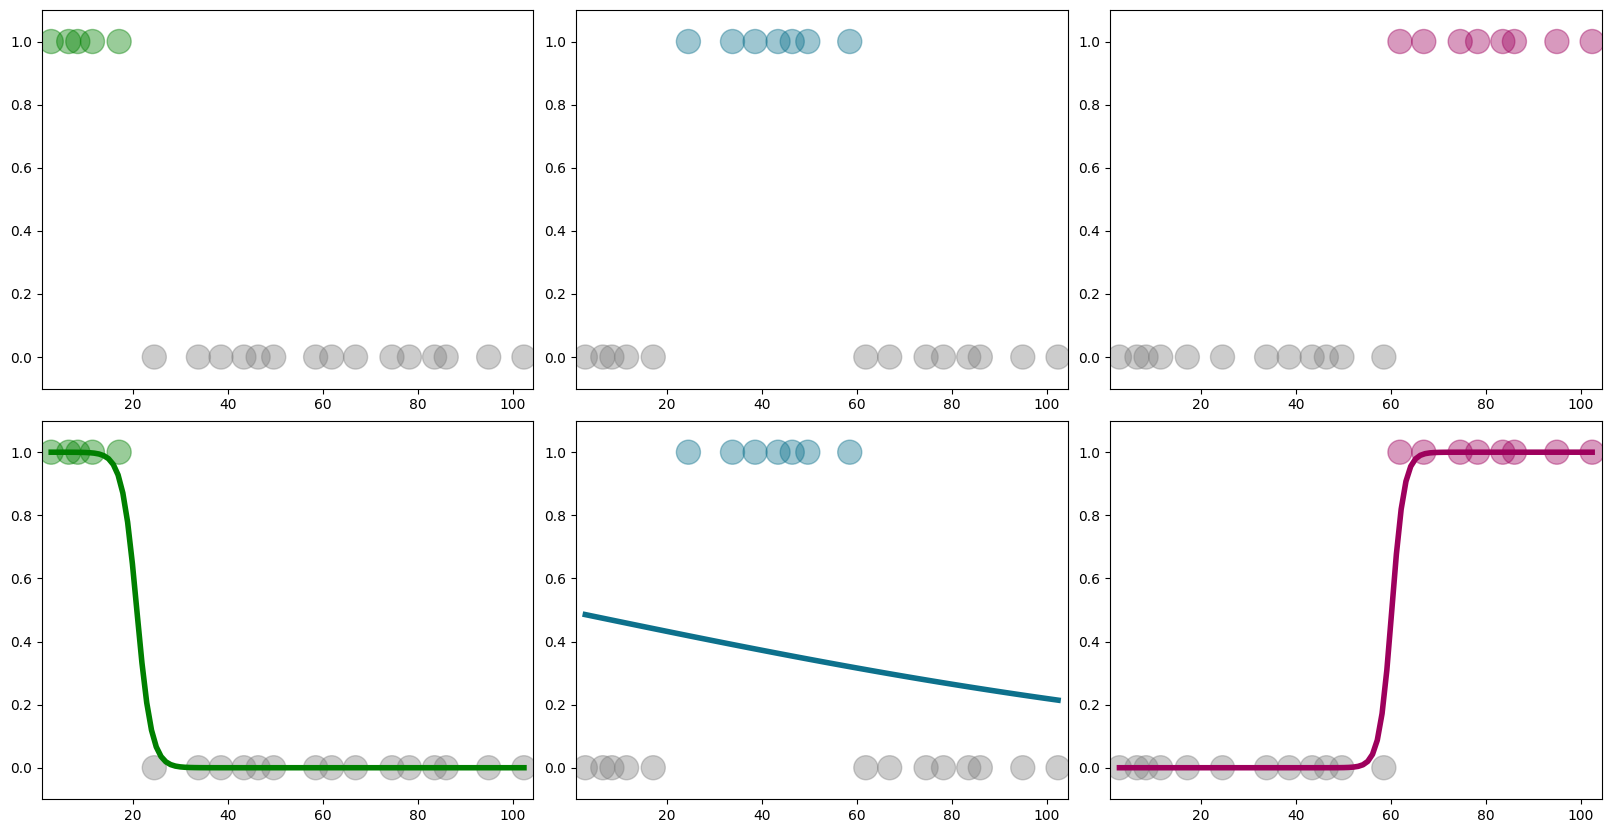

In [457]:
purpleVrest = LogisticRegression()
purpleVrest.fit(X.reshape(-1, 1), Y_purple)

greenVrest = LogisticRegression()
greenVrest.fit(X.reshape(-1, 1), Y_green)

blueVrest = LogisticRegression()
blueVrest.fit(X.reshape(-1, 1), Y_blue)

xplot = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
fig = plt.figure(figsize=(16, 12), constrained_layout=True, facecolor=None)

ax2 = fig.add_subplot(331)
c_green = np.array(['grey', COLORS[1]])
ax2.scatter(X, Y_green, color=c_green[Y_green].tolist(), s=300, alpha=.4)
ax2.set_xlim(np.min(X)-2, np.max(X)+2)
ax2.set_ylim(-0.1, 1.1)

ax3 = fig.add_subplot(332)
c_blue = np.array(['grey', COLORS[2]])
ax3.scatter(X, Y_blue, color=c_blue[Y_blue].tolist(), s=300, alpha=.4)
ax3.set_xlim(np.min(X)-2, np.max(X)+2)
ax3.set_ylim(-0.1, 1.1)

ax1 = fig.add_subplot(333)
c_purple = np.array(['grey', COLORS[0]])
ax1.scatter(X, Y_purple, color=c_purple[Y_purple].tolist(), s=300, alpha=.4)
ax1.set_xlim(np.min(X)-2, np.max(X)+2)
ax1.set_ylim(-0.1, 1.1)

ax5 = fig.add_subplot(334)
ax5.scatter(X, Y_green, color=c_green[Y_green].tolist(), s=300, alpha=.4)
ax5.plot(xplot, greenVrest.predict_proba(xplot)[:, 1], color=COLORS[1], linewidth=4)
ax5.set_xlim(np.min(X)-2, np.max(X)+2)
ax5.set_ylim(-0.1, 1.1)

ax6 = fig.add_subplot(335)
ax6.scatter(X, Y_blue, color=c_blue[Y_blue].tolist(), s=300, alpha=.4)
ax6.plot(xplot, blueVrest.predict_proba(xplot)[:, 1], color=COLORS[2], linewidth=4)
ax6.set_xlim(np.min(X)-2, np.max(X)+2)
ax6.set_ylim(-0.1, 1.1)

ax4 = fig.add_subplot(336)
ax4.scatter(X, Y_purple, color=c_purple[Y_purple].tolist(), s=300, alpha=.4)
ax4.plot(xplot, purpleVrest.predict_proba(xplot)[:, 1], color=COLORS[0], linewidth=4)
ax4.set_xlim(np.min(X)-2, np.max(X)+2)
ax4.set_ylim(-0.1, 1.1)

fig.savefig('008.png')

## All together

In [458]:
fig, ax = plt.subplots()
ax.scatter(X, np.zeros_like(Y), color=COLORS[Y].tolist(), s=300, alpha=.4)
ax.plot(xplot, purpleVrest.predict_proba(xplot)[:, 1], color=COLORS[0], linewidth=4)
ax.plot(xplot, greenVrest.predict_proba(xplot)[:, 1], color=COLORS[1], linewidth=4)
ax.plot(xplot, blueVrest.predict_proba(xplot)[:, 1], color=COLORS[2], linewidth=4)
ax.set_xlim(np.min(X), np.max(X))
ax.set_ylim(-0.1, 1.1)
fig.savefig('009.png')
plt.close()

## Decision Boundaries

In [459]:
models = [purpleVrest, greenVrest, blueVrest]
xx = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
preds = np.zeros((xx.shape[0], 3))
for i, model in enumerate(models):
    preds[:, i] = model.predict_proba(xx)[:, 1]
predicted_class = np.argmax(preds, axis=1)

xx, yy = np.meshgrid(xx, np.linspace(-0.1, 1.1, 100))
grid_points = xx.reshape(-1, 1)

grid_preds = np.zeros((grid_points.shape[0], 3))
for i, model in enumerate(models):
    grid_preds[:, i] = model.predict_proba(grid_points)[:, 1]

grid_predicted_class = np.argmax(grid_preds, axis=1)
grid_predicted_class = grid_predicted_class.reshape(xx.shape)

fig, ax = plt.subplots()
ax.scatter(X, np.zeros_like(Y), color=COLORS[Y].tolist(), s=300, alpha=.4)
ax.plot(xplot, purpleVrest.predict_proba(xplot)[:, 1], color=COLORS[0], linewidth=4)
ax.plot(xplot, greenVrest.predict_proba(xplot)[:, 1], color=COLORS[1], linewidth=4)
ax.plot(xplot, blueVrest.predict_proba(xplot)[:, 1], color=COLORS[2], linewidth=4)
ax.set_xlim(np.min(X), np.max(X))
ax.set_ylim(-0.1, 1.1)
ax.contourf(xx, yy, grid_predicted_class, alpha=0.3, levels=[-0.5, 0.5, 1.5, 2.5], colors=COLORS)
fig.savefig('010.png')
plt.close()

## only blue

In [460]:
models = [purpleVrest, greenVrest, blueVrest]
xx = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
preds = np.zeros((xx.shape[0], 3))
for i, model in enumerate(models):
    preds[:, i] = model.predict_proba(xx)[:, 1]
predicted_class = np.argmax(preds, axis=1)

xx, yy = np.meshgrid(xx, np.linspace(-0.1, 1.1, 100))
grid_points = xx.reshape(-1, 1)

grid_preds = np.zeros((grid_points.shape[0], 3))
for i, model in enumerate(models):
    grid_preds[:, i] = model.predict_proba(grid_points)[:, 1]

grid_predicted_class = np.argmax(grid_preds, axis=1)
grid_predicted_class = grid_predicted_class.reshape(xx.shape)

fig, ax = plt.subplots()
ax.scatter(X, np.zeros_like(Y), color=COLORS[Y].tolist(), s=300, alpha=.4)
ax.plot(xplot, purpleVrest.predict_proba(xplot)[:, 1], color=COLORS[0], linewidth=4)
ax.plot(xplot, greenVrest.predict_proba(xplot)[:, 1], color=COLORS[1], linewidth=4)
ax.plot(xplot, blueVrest.predict_proba(xplot)[:, 1], color=COLORS[2], linewidth=4)
ax.set_xlim(np.min(X), np.max(X))
ax.set_ylim(-0.1, 1.1)
ax.contourf(xx, yy, grid_predicted_class, alpha=0.3, levels=[1.5, 2.5], colors=[COLORS[2]])
fig.savefig('011.png')
plt.close()

## two thresholds

In [461]:
fig, ax = plt.subplots()
ax.scatter(X, np.zeros_like(Y), color=COLORS[Y].tolist(), s=300, alpha=.4)
ax.axvline(20, ymin=0, ymax=1, color=COLORS[1], linestyle='dashed')
ax.axvline(60, ymin=0, ymax=1, color=COLORS[0], linestyle='dashed')
ax.set_xlim(np.min(X)-5, np.max(X)+5)
ax.set_ylim(-0.1, 1.1)
fig.savefig('012.png')
plt.close()

## adapted sigmoid

In [462]:
def softmax(x, y):
    return 1 / (1 + np.exp(x) + np.exp(y))

xplot = np.linspace(np.min(X)-5, np.max(X)+5, 200)

fig, ax = plt.subplots()
ax.scatter(X, np.zeros_like(Y), color=COLORS[Y].tolist(), s=300, alpha=.4)
ax.axvline(20, ymin=0, ymax=1, color=COLORS[1], linestyle='dashed')
ax.axvline(60, ymin=0, ymax=1, color=COLORS[0], linestyle='dashed')
ax.plot(xplot, softmax(- xplot + 20,  xplot - 60), color=COLORS[2], label='$\\frac{1}{1 + e^{-(x-20)} + e^{(x-60)}}$')
ax.set_xlim(np.min(X)-5, np.max(X)+5)
ax.set_ylim(-0.1, 1.1)
ax.legend(fontsize=14, loc='center right')
fig.savefig('013.png')
plt.close()

## adapted sigmoid both positive

In [463]:
fig, ax = plt.subplots()
ax.scatter(X, np.zeros_like(Y), color=COLORS[Y].tolist(), s=300, alpha=.4)
ax.axvline(20, ymin=0, ymax=1, color=COLORS[1], linestyle='dashed')
ax.axvline(60, ymin=0, ymax=1, color=COLORS[0], linestyle='dashed')
ax.plot(xplot, softmax(xplot - 20,  xplot - 60), color=COLORS[2], label='$\\frac{1}{1 + e^{(x-20)} + e^{(x-60)}}$')
ax.set_xlim(np.min(X)-5, np.max(X)+5)
ax.set_ylim(-0.1, 1.1)
ax.legend(fontsize=14, loc='center right')
fig.savefig('014.png')
plt.close()

## Purple

In [464]:
def softmax(x, y, z):
    return 1 / (np.exp(x) + np.exp(y) + np.exp(z))

fig, ax = plt.subplots()
ax.scatter(X, np.zeros_like(Y), color=COLORS[Y].tolist(), s=300, alpha=.4)
ax.axvline(20, ymin=0, ymax=1, color=COLORS[1], linestyle='dashed')
ax.axvline(60, ymin=0, ymax=1, color=COLORS[0], linestyle='dashed')
ax.plot(xplot, np.exp(xplot + 10) * softmax(xplot + 10, - (1/4) * xplot + 85, xplot), color=COLORS[0], label='$\\frac{e^{x+10}}{e^{x+10} + e^{-\\frac{1}{4}x+85} + e^{x}}$')
ax.set_xlim(np.min(X)-5, np.max(X)+5)
ax.set_ylim(-0.1, 1.1)
ax.legend(fontsize=18, loc='center left')
fig.savefig('015.png')
plt.close()

## add purple

In [465]:
fig, ax = plt.subplots()
ax.scatter(X, np.zeros_like(Y), color=COLORS[Y].tolist(), s=300, alpha=.4)
ax.axvline(20, ymin=0, ymax=1, color=COLORS[1], linestyle='dashed')
ax.axvline(60, ymin=0, ymax=1, color=COLORS[0], linestyle='dashed')
ax.plot(xplot, np.exp(xplot + 10) * softmax(xplot + 10, - (1/4) * xplot + 85, xplot), color=COLORS[0], label='$\\frac{1}{1 + e^{-\\frac{1}{4}x+75} + e^{-10}}$')
ax.set_xlim(np.min(X)-5, np.max(X)+5)
ax.set_ylim(-0.1, 1.1)
ax.legend(fontsize=18, loc='center left')
fig.savefig('016.png')
plt.close()

## 3 classes 2D learning

In [494]:
def snap(model, X, Y):
    
    xplot = np.linspace(0, 100, 300)
    predictions = model.predict(xplot)
    fig, ax = plt.subplots(frameon=False)
    ax.scatter(X, np.zeros_like(X), color=COLORS[Y].tolist(), s=300, alpha=.4)
    for i in range(3):
        ax.plot(xplot, predictions[:, i], color=COLORS[i])
    ax.set_ylim(-0.1, 1.1)
    fig.savefig(TEMPFILE_NAME)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

model = keras.models.Sequential()
model.add(keras.layers.Dense(3, input_dim=1, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-1))

images = []

for _ in range(200):
    _ = model.fit(X, keras.utils.to_categorical(Y), epochs= 10)
    images.append(snap(model, X, Y))

save_to_gif('017.gif', images)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 19.3527
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.8313
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3248
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.8811
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.0288
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1719
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6695
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2195
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9684
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9423
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1099
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3307
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9615
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.4027
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.5

## 3 classes 2D

In [466]:
CENTERS = [[-1, 1], [1, 1], [-1, -1]]
STDEV = .3
DATA, _ = datasets.make_blobs(
        n_samples=200,
        centers=CENTERS,
        cluster_std=STDEV,
        random_state=1
    )

X = np.array(list(filter(lambda x : (x[0] < 0 or x[1] > 0), DATA)))
Y = np.array([0 if x[0] > 0 and x[1] > 0 else 2 if x[0] < 0 and x[1] > 0 else 1 for x in X])

xlim_min = np.min(X[:, 0]) - .3
xlim_max = np.max(X[:, 0]) + .3
ylim_min = np.min(X[:, 1]) - .3
ylim_max = np.max(X[:, 1]) + .3

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=COLORS[Y].tolist(), s=200, alpha=.4)
ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)
fig.savefig('017.png')
plt.close()

## 3D

In [467]:
fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
ax = plt.axes(projection ='3d')
ax.view_init(20, -135)
ax.scatter(X[:, 0], X[:, 1], np.ones_like(Y), color=COLORS[Y].tolist(), s=200, alpha=.4)
ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)
ax.set_zlim(-.1, 1.1)
ax.set_xlabel('$X_1$', fontsize=20)
ax.set_ylabel('$X_2$', fontsize=20)
fig.savefig('018.png')
plt.close()

## 3D normal sigmoid

In [468]:
slide_speed = .1
from_x = [-2, -1]
from_y = [1, 2]
final_xlim = [xlim_min, xlim_max]
final_ylim = [ylim_min, ylim_max]

my_func = lambda x, y: sigmoid(2*y-2*x - 2)

def snap(slide):
    fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -135)

    ax.scatter(X[:, 0], X[:, 1], np.ones_like(Y), color=COLORS[Y].tolist(), s=200, alpha=.4)
    ax.set_xlabel('$X_1$', fontsize=20)
    ax.set_ylabel('$X_2$', fontsize=20)
    min_z = -.1
    max_z = 1.1

    ax.set_xlim([final_xlim[0], final_xlim[1]])
    ax.set_ylim([final_ylim[0], final_ylim[1]])
    ax.set_zlim([min_z, max_z])

    xx = np.linspace(from_x[0], from_x[1] + slide * slide_speed, 1000)
    yy = np.linspace(from_y[0] - slide * slide_speed, from_y[1], 1000)
    x, y = np.meshgrid(xx, yy)
    Z = my_func(x, y)

    ax.plot_surface(x, y, Z, cmap=CMAP_BLUE, alpha=.4, vmin = 0.0, vmax = 1.0)

    fig.savefig(TEMPFILE_NAME, bbox_inches='tight')
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []
for i in range(int((xlim_max - from_x[1]) / slide_speed)):
    images.append(snap(i))

save_to_gif("019.gif", images)

## rotate + decision boundary

In [469]:
final_xlim = [xlim_min, xlim_max]
final_ylim = [ylim_min, ylim_max]

my_func = lambda x, y: sigmoid(2*y-2*x - 2)

def snap(rot):
    fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
    ax = plt.axes(projection ='3d')
    ax.view_init(20 + rot, -135)
    ax.scatter(X[:, 0], X[:, 1], np.ones_like(Y), color=COLORS[Y].tolist(), s=200, alpha=.4)
    ax.set_xlabel('$X_1$', fontsize=20)
    ax.set_ylabel('$X_2$', fontsize=20)

    # full view
    xx = np.linspace(final_xlim[0], final_xlim[1], 400)
    yy = np.linspace(final_ylim[0], final_ylim[1], 400)
    x, y = np.meshgrid(xx, yy)

    Z = my_func(x, y)
    min_z = -.1
    max_z = 1.1

    ax.set_xlim([final_xlim[0], final_xlim[1]])
    ax.set_ylim([final_ylim[0], final_ylim[1]])
    ax.set_zlim([min_z, max_z])

    ax.plot_surface(x, y, Z, cmap=CMAP_BLUE, alpha=.4, vmin = 0.0, vmax = 1.0)
    xx = np.linspace(xlim_min, xlim_max - 1, 100)
    ax.plot(xx, xx + 1, np.zeros_like(xx) + .5, linestyle='--', linewidth=3, color='b')
    fig.savefig(TEMPFILE_NAME)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []

for i in range(70):
    images.append(snap(i))

save_to_gif('020.gif', images)

## 3D first sigmoid

In [470]:
cvals  = [0, .5, 1]
colors = [COLORS[0], 'white', COLORS[2]]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap_purple = mpl.colors.LinearSegmentedColormap.from_list("", tuples, 100)

slide_speed = .1
from_x_first = [-2, -1.5]
from_y_first = [0, 2]
final_xlim = [xlim_min, xlim_max]
final_ylim = [ylim_min, ylim_max]

first_sigmoid = lambda x, y: sigmoid(-4*x)

def snap(slide):
    fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -135)

    ax.scatter(X[:, 0], X[:, 1], np.ones_like(Y), color=COLORS[Y].tolist(), s=200, alpha=.4)
    ax.set_xlabel('$X_1$', fontsize=20)
    ax.set_ylabel('$X_2$', fontsize=20)
    min_z = -.1
    max_z = 1.1

    ax.set_xlim([final_xlim[0], final_xlim[1]])
    ax.set_ylim([final_ylim[0], final_ylim[1]])
    ax.set_zlim([min_z, max_z])

    xx = np.linspace(from_x_first[0], from_x_first[1] + slide * slide_speed, 1000)
    yy = np.linspace(from_y_first[0], from_y_first[1], 1000)
    x, y = np.meshgrid(xx, yy)
    Z = first_sigmoid(x, y)

    ax.plot_surface(x, y, Z, cmap=cmap_purple, alpha=.4, vmin = 0.0, vmax = 1.0)

    fig.savefig(TEMPFILE_NAME, bbox_inches='tight')
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []
for i in range(int((xlim_max - from_x[1]) / slide_speed)+1):
    images.append(snap(i))

save_to_gif("021.gif", images)

## 3D second sigmoid

In [471]:
cvals  = [0, .5, 1]
colors = [COLORS[1], 'white', COLORS[2]]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap_green = mpl.colors.LinearSegmentedColormap.from_list("", tuples, 100)

slide_speed = .1
from_x_second = [-2, 0]
from_y_second = [1.5, 2]
final_xlim = [xlim_min, xlim_max]
final_ylim = [ylim_min, ylim_max]

second_sigmoid = lambda x, y: sigmoid(4*y)

def snap(slide):
    fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -135)

    ax.scatter(X[:, 0], X[:, 1], np.ones_like(Y), color=COLORS[Y].tolist(), s=200, alpha=.4)
    ax.set_xlabel('$X_1$', fontsize=20)
    ax.set_ylabel('$X_2$', fontsize=20)

    # full view
    xx = np.linspace(final_xlim[0], final_xlim[1], 400)
    yy = np.linspace(from_y_first[0], from_y_first[1], 400)
    x, y = np.meshgrid(xx, yy)

    ax.plot_surface(x, y, first_sigmoid(x, y), cmap=cmap_purple, alpha=.4, vmin = 0.0, vmax = 1.0)
    min_z = -.1
    max_z = 1.1

    ax.set_xlim([final_xlim[0], final_xlim[1]])
    ax.set_ylim([final_ylim[0], final_ylim[1]])
    ax.set_zlim([min_z, max_z])

    xx = np.linspace(from_x_second[0], from_x_second[1], 1000)
    yy = np.linspace(from_y_second[0] + slide * slide_speed, from_y_second[1], 1000)
    x, y = np.meshgrid(xx, yy)
    Z = second_sigmoid(x, y)

    ax.plot_surface(x, y, Z, cmap=cmap_green, alpha=.4, vmin = 0.0, vmax = 1.0)

    fig.savefig(TEMPFILE_NAME, bbox_inches='tight')
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []
for i in range(-int((ylim_min - from_y[1]) / slide_speed)+1):
    images.append(snap(-i))

save_to_gif("022.gif", images)

## Rotate + decision boundary

In [472]:
final_xlim = [xlim_min, xlim_max]
final_ylim = [ylim_min, ylim_max]

def snap(rot):
    xx = np.linspace(xlim_min, xlim_max, 100)
    yy = np.linspace(ylim_min, ylim_max, 100)
    x, y = np.meshgrid(xx, yy)

    fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
    ax = plt.axes(projection ='3d')
    ax.view_init(20 + rot, -135)
    ax.scatter(X[:, 0], X[:, 1], np.ones_like(Y), color=COLORS[Y].tolist(), s=200, alpha=.4)
    ax.set_xlabel('$X_1$', fontsize=20)
    ax.set_ylabel('$X_2$', fontsize=20)

    xx = np.linspace(final_xlim[0], final_xlim[1], 400)
    yy = np.linspace(from_y_first[0], from_y_first[1], 400)
    x, y = np.meshgrid(xx, yy)
    ax.plot_surface(x, y, first_sigmoid(x, y), cmap=cmap_purple, alpha=.4, vmin = 0.0, vmax = 1.0)

    xx = np.linspace(from_x_second[0], from_x_second[1], 400)
    yy = np.linspace(final_ylim[0], final_ylim[1], 400)
    x, y = np.meshgrid(xx, yy)
    ax.plot_surface(x, y, second_sigmoid(x, y), cmap=cmap_green, alpha=.4, vmin = 0.0, vmax = 1.0)

    min_z = -.1
    max_z = 1.1
    ax.set_xlim([final_xlim[0], final_xlim[1]])
    ax.set_ylim([final_ylim[0], final_ylim[1]])
    ax.set_zlim([min_z, max_z])

    xx = np.linspace(xlim_min, 0, 100)
    yy = np.linspace(0, ylim_max, 100)
    ax.plot(xx, np.zeros_like(xx), np.zeros_like(xx) + .5, linestyle='--', linewidth=5, color='green')
    ax.plot(np.zeros_like(yy), yy, np.zeros_like(yy) + .5, linestyle='--', linewidth=5, color='purple')
    fig.savefig(TEMPFILE_NAME)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []

for i in range(70):
    images.append(snap(i))

save_to_gif('023.gif', images)

## Softmax

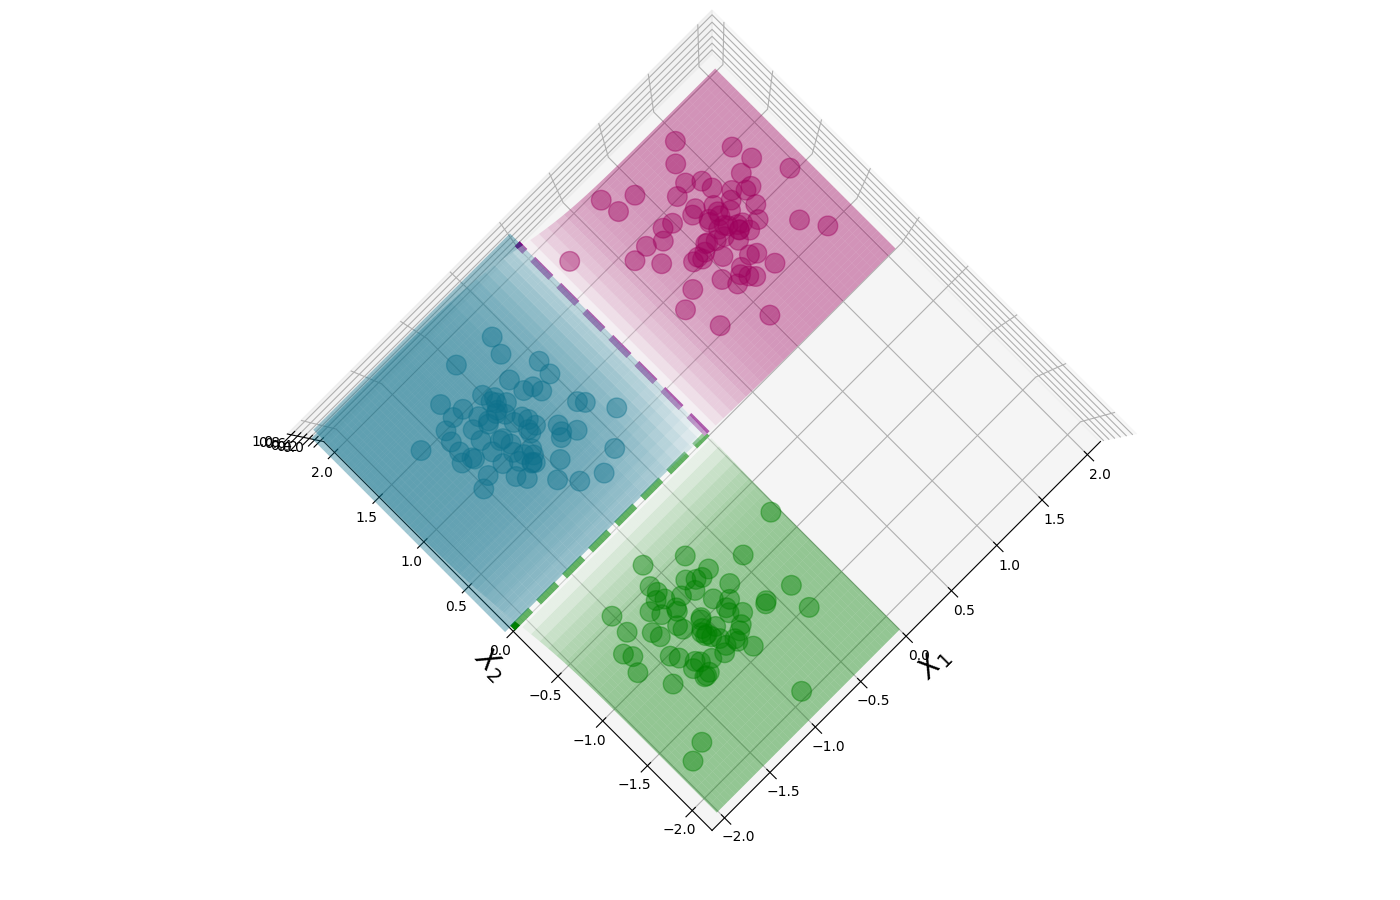

In [473]:
slide_speed = .1
from_x = [-2, -1]
from_y = [1, 2]
final_xlim = [xlim_min, xlim_max]
final_ylim = [ylim_min, ylim_max]

def softmax(x, y):
    return 1 / (1 + np.exp(x) + np.exp(y))

my_func = lambda x, y: softmax(4*x, -4*y)

def snap(slide, filename):
    fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -135)

    ax.scatter(X[:, 0], X[:, 1], np.ones_like(Y), color=COLORS[Y].tolist(), s=200, alpha=.4)
    ax.set_xlabel('$X_1$', fontsize=20)
    ax.set_ylabel('$X_2$', fontsize=20)
    min_z = -.1
    max_z = 1.1
    ax.set_xlim([final_xlim[0], final_xlim[1]])
    ax.set_ylim([final_ylim[0], final_ylim[1]])
    ax.set_zlim([min_z, max_z])

    xx = np.linspace(from_x[0], from_x[1] + slide * slide_speed, 1000)
    yy = np.linspace(from_y[0] - slide * slide_speed, from_y[1], 1000)
    x, y = np.meshgrid(xx, yy)
    Z = my_func(x, y)

    ax.plot_surface(x, y, Z, cmap=CMAP_BLUE, alpha=.4, vmin = 0.0, vmax = 1.0)

    fig.savefig(filename, bbox_inches='tight')
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

slide = int((xlim_max - from_x[1]) / slide_speed)
snap(slide, '024.png')

In [474]:
images = []
for i in range(int((xlim_max - from_x[1]) / slide_speed)):
    images.append(snap(i, TEMPFILE_NAME))

save_to_gif("025.gif", images)

## blue v purple v green

In [475]:
final_xlim = [xlim_min, xlim_max]
final_ylim = [ylim_min, ylim_max]

def softmax(x, y):
    return 1 / (1 + np.exp(x) + np.exp(y))

my_func = lambda x, y: softmax(4*x, -4*y)

def snap(rotz, rotxy):
    fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
    ax = plt.axes(projection ='3d')
    ax.view_init(20 + rotz, -135 + rotxy)

    ax.scatter(X[:, 0], X[:, 1], np.ones_like(Y), color=COLORS[Y].tolist(), s=200, alpha=.4)
    ax.set_xlabel('$X_1$', fontsize=20)
    ax.set_ylabel('$X_2$', fontsize=20)

    # full view
    xx = np.linspace(final_xlim[0], final_xlim[1], 500)
    yy = np.linspace(final_ylim[0], final_ylim[1], 500)
    x, y = np.meshgrid(xx, yy)

    Z = my_func(x, y)
    min_z = -.1
    max_z = 1.1

    ax.set_xlim([final_xlim[0], final_xlim[1]])
    ax.set_ylim([final_ylim[0], final_ylim[1]])
    ax.set_zlim([min_z, max_z])

    ax.plot_surface(x, y, Z, cmap=CMAP_BLUE, alpha=.4, vmin = 0.0, vmax = 1.0)
    ax.contour(x, y, Z, levels=1, colors='b', linestyle='dashed')

    fig.savefig(TEMPFILE_NAME, bbox_inches='tight')
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []
for i in range(20):
    images.append(snap(-i, 0))

for i in range(36):
    images.append(snap(-20, i*4))

save_to_gif("026.gif", images)

/var/folders/89/x_333x1920nb7086021gwhlw0000gn/T/ipykernel_2099/2486921149.py:32: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(x, y, Z, levels=1, colors='b', linestyle='dashed')


## adjusting the parameters

In [476]:
final_xlim = [xlim_min, xlim_max]
final_ylim = [ylim_min, ylim_max]

def softmax(x, y):
    return 1 / (1 + np.exp(x) + np.exp(y))

my_func = lambda x, y: lambda w1, w2, b: softmax(w1*x, -w2*y + b)

def snap(w1, w2, b):
    fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -135)

    ax.scatter(X[:, 0], X[:, 1], np.ones_like(Y), color=COLORS[Y].tolist(), s=200, alpha=.4)
    ax.set_xlabel('$X_1$', fontsize=20)
    ax.set_ylabel('$X_2$', fontsize=20)

    xx = np.linspace(final_xlim[0], final_xlim[1], 500)
    yy = np.linspace(final_ylim[0], final_ylim[1], 500)
    x, y = np.meshgrid(xx, yy)

    Z = my_func(x, y)(w1, w2, b)
    min_z = -.1
    max_z = 1.1

    ax.set_xlim([final_xlim[0], final_xlim[1]])
    ax.set_ylim([final_ylim[0], final_ylim[1]])
    ax.set_zlim([min_z, max_z])

    ax.plot_surface(x, y, Z, cmap=CMAP_BLUE, alpha=.4, vmin = 0.0, vmax = 1.0)
    ax.contour(x, y, Z, levels=1, colors='b', linestyle='dashed')

    fig.savefig(TEMPFILE_NAME, bbox_inches='tight')
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []

for i in range(1, 100):
    images.append(snap(i/10, i/10, 0))

save_to_gif("027.gif", images)

/var/folders/89/x_333x1920nb7086021gwhlw0000gn/T/ipykernel_2099/2632138924.py:31: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(x, y, Z, levels=1, colors='b', linestyle='dashed')


## 3 classes 3D

In [477]:
class LR():

    def __init__(self, model):
        """
        Parameters:
            model: A keras model.
                Since our class is called DenseGraph(), the keras model should only contain dense layers.
        """
        self.model = model

    def _snap_learning_3D(self, X, Y, filename, rot):
        """
        Take snapshot of input with decision boundary
        """
        xx = np.linspace(xlim_min, xlim_max, 300)
        yy = np.linspace(ylim_min, ylim_max, 300)
        x, y = np.meshgrid(xx, yy)
        meshData = np.c_[x.ravel(), y.ravel()]
        fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
        ax = plt.axes(projection ='3d')
        ax.view_init(30, -25 - rot)
        ax.scatter(X[:,0], X[:,1], np.ones(Y.shape), color=COLORS[Y].tolist(), s=400, alpha=.4)
        ax.plot_surface(x, y, self.model.predict(meshData)[:, 0].reshape(x.shape), alpha=.2, color=COLORS[0])
        ax.plot_surface(x, y, self.model.predict(meshData)[:, 1].reshape(x.shape), alpha=.2, color=COLORS[1])
        ax.plot_surface(x, y, self.model.predict(meshData)[:, 2].reshape(x.shape), alpha=.2, color=COLORS[2])
        ax.set_xlim(xlim_min, xlim_max)
        ax.set_ylim(ylim_min, ylim_max)
        fig.savefig(filename + '.png')
        plt.close()

        return np.asarray(im.open(filename + '.png'))


    def animate_learning_3D(self, X, Y, snap_freq=10, filename='learn', duration=1000, **kwargs):
        """
        Make GIF from snapshots of decision boundary at given snap_freq

        Parameters:
            X : ndarray
                input to a Keras model
            Y : ndarray
                classes to be learned
            snap_freq : int
                number of epochs after which to take a snapshot
            filename : str
                name of file to save as GIF
            duration : int
                duration in ms between images in GIF
            **kwargs : other params
                paramter inputs to model.fit

        Returns:
            The model after learning
        """

        images = []
        if 'epochs' in kwargs:
            epochs = kwargs['epochs']
            kwargs.pop('epochs', None)
        else:
            epochs = snap_freq

        for i in range(int(epochs / snap_freq)):
            self.model.fit(X, keras.utils.to_categorical(Y), epochs=snap_freq, **kwargs)
            images.append(im.fromarray(self._snap_learning_3D(X, Y, filename, i)))

        images[0].save(
            filename + '.gif',
            optimize=False,  # important for transparent background
            save_all=True,
            append_images=images[1:],
            loop=0,
            duration=duration
        )
        return self.model

model = keras.models.Sequential()
model.add(keras.layers.Dense(3, input_dim=2, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-1))

obj = LR(model)
obj.animate_learning_3D(X, Y, 1, '028', 200, epochs=40, batch_size=100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0460  
   1/2813 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step

/Users/lance/Documents/BostonUniversity/Data-Science-Fundamentals/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7487
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5422
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 163us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4202
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 186us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3023
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2344
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step
2813/2813 ━━━━━━━━━━

<Sequential name=sequential_61, built=True>

## Softmax

In [478]:
def softmax(x1, x2):
    exp_x1 = np.exp(-x1)
    exp_x2 = np.exp(-x2)
    total = 1 + exp_x1 + exp_x2
    return exp_x1 / total, exp_x2 / total, 1 / total

def snap(rot_z, rot_xy):
    xx = np.linspace(-6, 6, 400)
    yy = np.linspace(-6, 6, 400)
    x, y = np.meshgrid(xx, yy)

    z1, z2, z3 = softmax(x, y)

    fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(20 + rot_z, -135 - rot_xy)

    ax.plot_surface(x, y, z1, color=COLORS[0], alpha=0.3)
    ax.plot_surface(x, y, z2, color=COLORS[1], alpha=0.3)
    ax.plot_surface(x, y, z3, color=COLORS[2], alpha=0.3)
    ax.contour(x, y, z1, levels=1, colors=COLORS[0])
    ax.contour(x, y, z2, levels=1, colors=COLORS[1])
    ax.contour(x, y, z3, levels=1, colors=COLORS[2])

    ax.set_xlabel('$x_1$', fontsize=15)
    ax.set_ylabel('$x_2$', fontsize=15)
    ax.set_title('softmax(' + '$x_1$' + "," + '$x_2$' + ')', fontsize=40)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_zlim(-.01, 1.01)
    fig.savefig(TEMPFILE_NAME)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []

for i in range(180):
    images.append(snap(0, i))

save_to_gif("029.gif", images, 10)

In [479]:
def softmax(x1, x2):
    exp_x1 = np.exp(-x1)
    exp_x2 = np.exp(-x2)
    total = 1 + exp_x1 + exp_x2
    return exp_x1 / total, exp_x2 / total, 1 / total

def snap(i, rot_z, rot_xy):
    xx = np.linspace(-6, 6, 400)
    yy = np.linspace(-6, 6, 400)
    x, y = np.meshgrid(xx, yy)

    z1, z2, z3 = softmax(i * x, y)

    fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(20 + rot_z, -135 - rot_xy)

    ax.plot_surface(x, y, z1, color=COLORS[0], alpha=0.3, label='Softmax(x1)')
    ax.plot_surface(x, y, z2, color=COLORS[1], alpha=0.3, label='Softmax(x2)')
    ax.plot_surface(x, y, z3, color=COLORS[2], alpha=0.3, label='Softmax(x2)')
    ax.contour(x, y, z1, levels=1, colors=COLORS[0])
    ax.contour(x, y, z2, levels=1, colors=COLORS[1])
    ax.contour(x, y, z3, levels=1, colors=COLORS[2])

    ax.set_xlabel('$x_1$', fontsize=15)
    ax.set_ylabel('$x_2$', fontsize=15)
    ax.set_title('softmax(i x_1, x_2)'.replace('i', f'{i:.2f}'), fontsize=40)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_zlim(-.01, 1.01)
    fig.savefig(TEMPFILE_NAME)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []

for i in range(10, 50):
    images.append(snap(i/10, 0, 0))

save_to_gif("030.gif", images, 10)

## Reflection

In [480]:
def snap(i):
    point = [-2, 2]
    reflection = [point[0] + i, point[1] - i]
    xplot = np.linspace(-3, 3, 100)
    fig, ax = plt.subplots()
    ax.plot(xplot, xplot, c='b', linestyle='dashed')
    ax.scatter(point[0], point[1], c=COLORS[0], s=400, alpha=.5)
    ax.scatter(reflection[0], reflection[1], c=COLORS[2], s=400, alpha=.5)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    fig.savefig(TEMPFILE_NAME)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []

for i in range(400):
    images.append(snap(i/100))

save_to_gif("31.gif", images, 10)

In [481]:
def snap(i):
    point = [-2, 2]
    reflection_green = [point[0] + i, point[1]]
    reflection_purple = [point[0], point[1] - i]

    purple = np.linspace(-3, 0, 100)
    green = np.linspace(0, 3, 100)
    blue = np.linspace(0, 3, 100)
    fig, ax = plt.subplots()
    ax.plot(purple, np.zeros_like(purple), c=COLORS[0], linestyle='dashed')
    ax.plot(np.zeros_like(green), green, c=COLORS[1], linestyle='dashed')
    ax.plot(blue, -blue, c=COLORS[2], linestyle='dashed')

    ax.scatter(point[0], point[1], c=COLORS[2], s=400, alpha=.5)
    ax.scatter(reflection_green[0], reflection_green[1], c=COLORS[1], s=400, alpha=.5)
    ax.scatter(reflection_purple[0], reflection_purple[1], c=COLORS[0], s=400, alpha=.5)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    fig.savefig(TEMPFILE_NAME)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []

for i in range(400):
    images.append(snap(i/100))

save_to_gif("32.gif", images, 10)

## Training 3D

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3016  


/Users/lance/Documents/BostonUniversity/Data-Science-Fundamentals/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0723
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8871
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7232
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5941 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4879 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4105 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3439
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 163us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2974 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2594 
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2238
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step
2/

KeyboardInterrupt: 

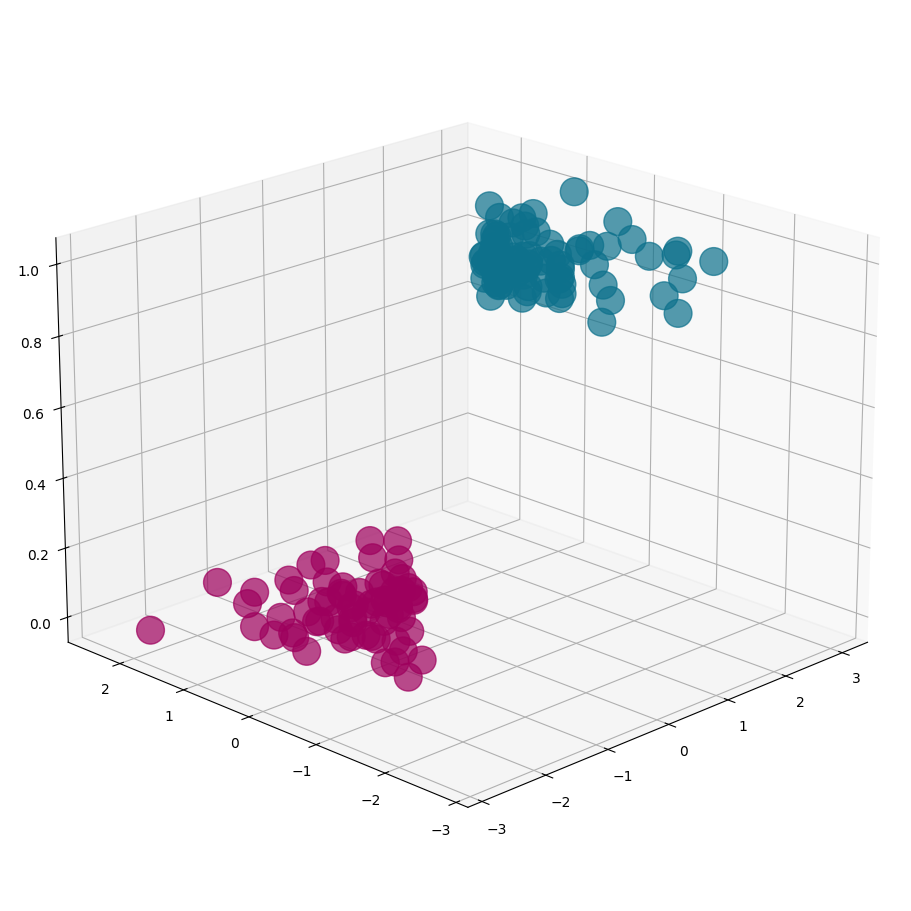

In [487]:
CENTERS = [[0, 0]]
STDEV = 1
DATA, _ = datasets.make_blobs(
        n_samples=200,
        centers=CENTERS,
        cluster_std=STDEV,
        random_state=1
    )
xlim_min = CENTERS[0][0] - 3 * STDEV
xlim_max = CENTERS[0][0] + 3 * STDEV
ylim_min = CENTERS[0][1] - 3 * STDEV
ylim_max = CENTERS[0][1] + 3 * STDEV

X, Y = generate_line_data(DATA, 1, -1, 0)

class LR():

    def __init__(self, model):
        self.model = model

    def _snap_learning_3D(self, X, Y_0_1, filename, rot):
        xplot = np.linspace(-3, 3, 100)
        x, y = np.meshgrid(xplot, xplot)
        meshData = np.c_[x.ravel(), y.ravel()]
        fig = plt.figure(figsize =(14, 9), constrained_layout=True, facecolor=None)
        ax = plt.axes(projection ='3d')
        ax.view_init(20, - 135 - rot)
        ax.scatter(X[:,0], X[:,1], Y_0_1, color=COLORS[Y].tolist(), s=400, alpha=.7)
        ax.plot_surface(x, y, self.model.predict(meshData).reshape(x.shape), alpha=.5, cmap=CMAP, lw=0)
        ax.set_xlim(xlim_min, xlim_max)
        ax.set_ylim(ylim_min, ylim_max)
        fig.savefig(filename + '.png')
        plt.close()
        return np.asarray(im.open(filename + '.png'))


    def animate_learning_3D(self, X, Y_0_1, snap_freq=10, filename='learn', duration=1000, **kwargs):
        images = []
        if 'epochs' in kwargs:
            epochs = kwargs['epochs']
            kwargs.pop('epochs', None)
        else:
            epochs = snap_freq

        for i in range(int(epochs / snap_freq)):
            self.model.fit(X, Y_0_1, epochs=snap_freq, **kwargs)
            images.append(im.fromarray(self._snap_learning_3D(X, Y_0_1, filename, 0)))
        
        for i in range(20):
            images.append(im.fromarray(self._snap_learning_3D(X, Y_0_1, filename, i)))

        images[0].save(
            filename + '.gif',
            optimize=False,  # important for transparent background
            save_all=True,
            append_images=images[1:],
            loop=0,
            duration=duration
        )
        return self.model

Y_0_1 = Y.copy()
Y_0_1[np.where(Y_0_1 == 0)] = 0
Y_0_1[np.where(Y_0_1 == 2)] = 1

model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim=2, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-1))

obj = LR(model)
obj.animate_learning_3D(X, Y_0_1, 1, '033', 200, epochs=50, batch_size=100)

## 2 classes

In [488]:
xplot = np.linspace(xlim_min, xlim_max)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], color=COLORS[Y].tolist(), s=400, alpha=.7)
ax.plot(xplot, xplot, linestyle='dashed', color='b')
ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)
fig.savefig('34.png')
plt.close()

## Sandbox

In [484]:
X, Y = generate_line_data(DATA, 1, -1, 0)

def snap(w1, w2, b):
    x = np.linspace(-3, 3, 100)

    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], color=COLORS[Y].tolist(), s=400, alpha=.4)
    ax.plot(w1 * x, - w2 * x - b, color='b', linestyle='dashed', linewidth=4)
    ax.set_xlabel('$x_1$', fontsize=25)
    ax.set_ylabel('$x_2$', fontsize=25)
    ax.set_title(f'{w1:.1f}' + '$x_1 + $' + f'{w2:.1f}' + '$x_2 + $' + f'{b:.1f}', fontsize=30)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    fig.savefig(TEMPFILE_NAME)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE_NAME)))

images = []

for i in range(-50, 50):
    images.append(snap(i/10, 1, 0))

for i in range(10, 50): 
    images.append(snap(5, i/10, 0))

for i in range(-50, 50): 
    images.append(snap(5, -i/10, 0))

for i in range(0, 50):
    images.append(snap(5, -5, i/10))

for i in range(-50, 50):
    images.append(snap(5, -5, -i/10))

save_to_gif("sandbox.gif", images, 10)